In [1]:
import matplotlib.pyplot as plt
import anndata as ad

import pandas as pd
import seaborn as sns

from cytodatagen.utils.plotting import plot_marker_pairplot, plot_shared_tsne_grid

from pyhere import here

data_path = here("artifacts/demo/cytodata.h5ad")

In [2]:
cyto_adata = ad.read_h5ad(data_path)

In [3]:
cyto_adata.obs.head()

,ct_name,ct_id,label,subject_id
subject_0_cell_0,ct_0,0,control,0
subject_0_cell_1,ct_0,0,control,0
subject_0_cell_2,ct_0,0,control,0
subject_0_cell_3,ct_0,0,control,0
subject_0_cell_4,ct_0,0,control,0


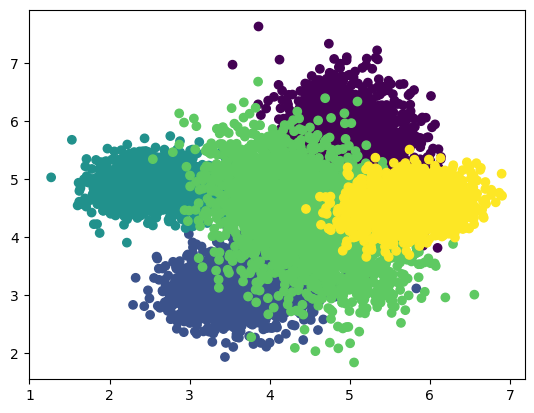

In [11]:
sample = cyto_adata[cyto_adata.obs["subject_id"] == 50]
ct_labels = sample.obs["ct_id"]

plt.scatter(sample.X[:, 1], sample.X[:, 0], c=ct_labels)

# Marker Distributions

<Axes: xlabel='value', ylabel='variable'>

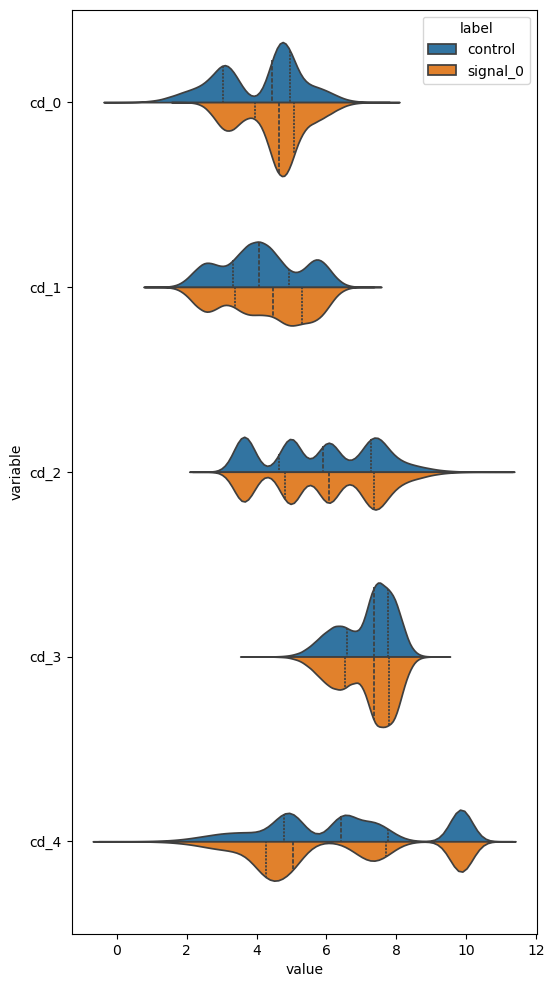

In [12]:
from cytodatagen.utils.adata import adata_to_df
import seaborn as sns
import pandas as pd

from cytodatagen.utils.plotting import plot_marker_dists


plot_marker_dists(cyto_adata)

## Cell Type Distributions

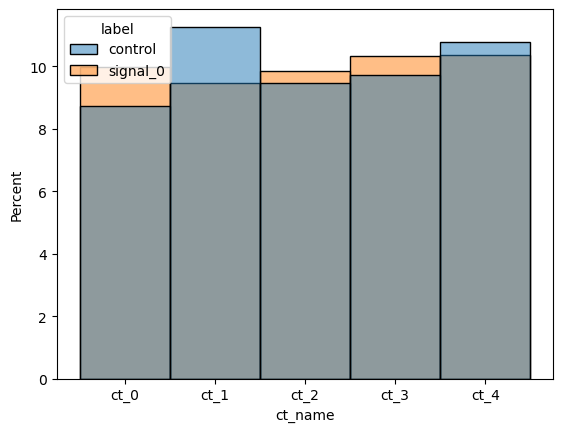

In [13]:
from cytodatagen.utils.plotting import plot_ct_dists

plot_ct_dists(cyto_adata)

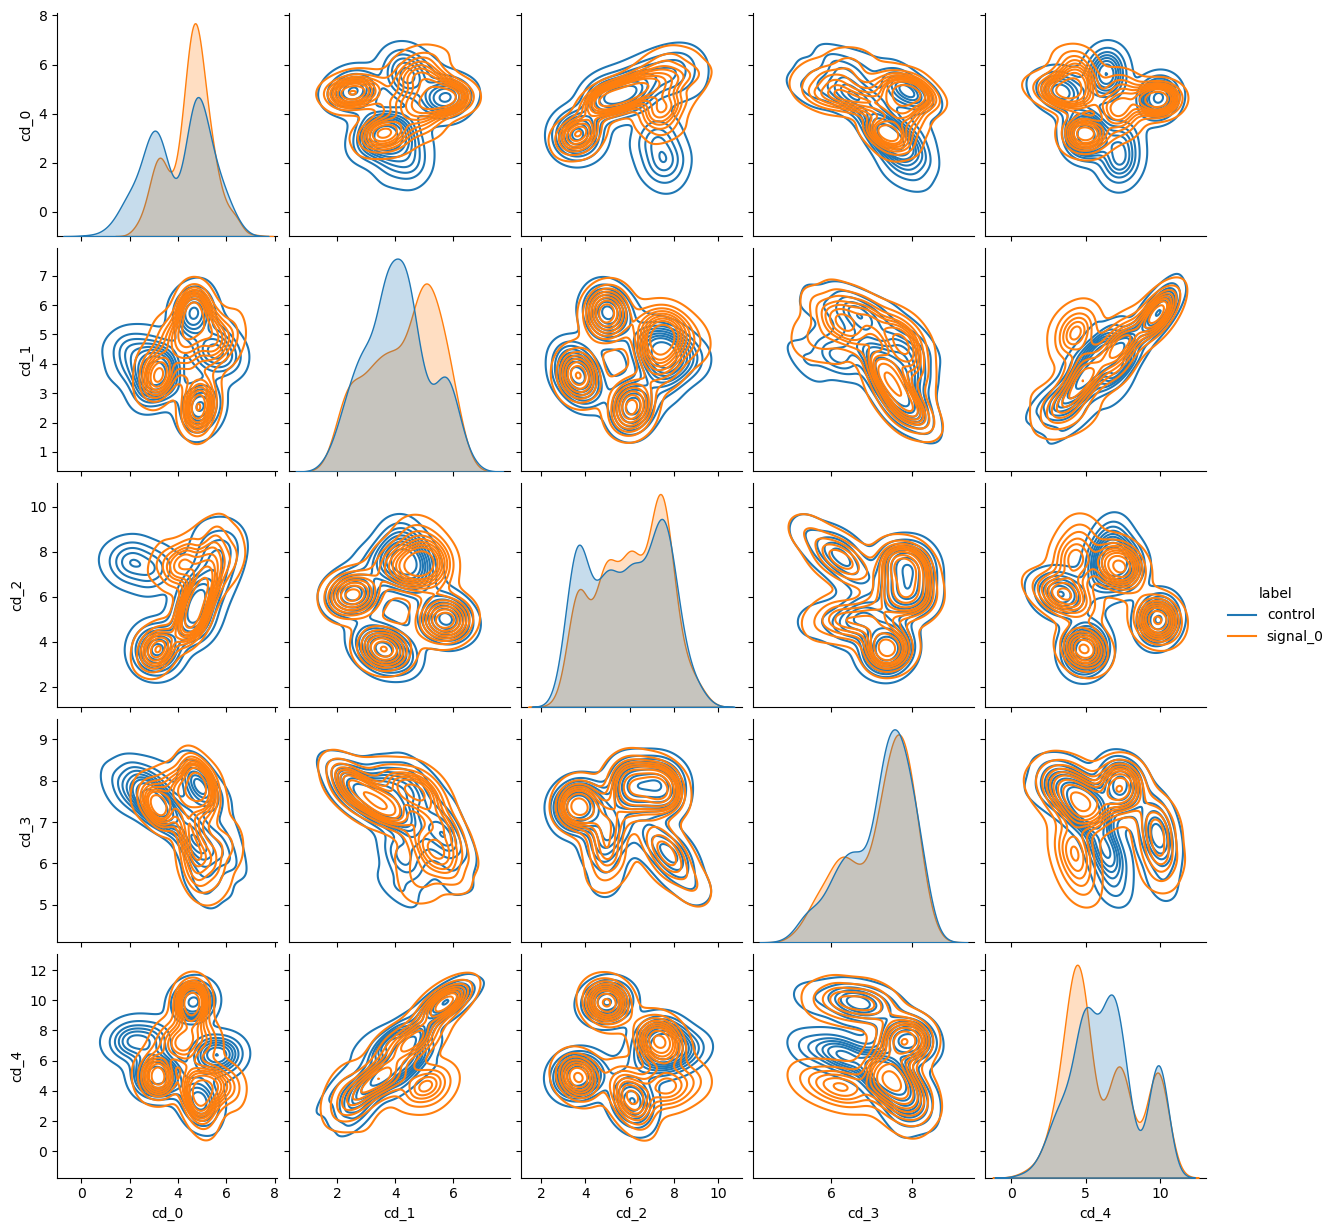

In [14]:

markers = cyto_adata.var_names.to_list()

obs = cyto_adata.obs.sample(1_000, random_state=19)
sub_adata = cyto_adata[obs.index, markers]
df = sub_adata.to_df()
df["label"] = sub_adata.obs["label"]

plot_marker_pairplot(sub_adata, markers=markers, kind="kde")

# t-SNE Embedding

,ct_name,ct_id,label,subject_id,tsne_1,tsne_2
subject_9_cell_1969,ct_0,0,control,9,1.939933,90.242104
subject_10_cell_742,ct_0,0,control,10,1.710031,79.390030
subject_28_cell_9281,ct_4,4,control,28,43.149853,-40.622829
subject_10_cell_9305,ct_4,4,control,10,57.373585,8.834949
subject_30_cell_5949,ct_3,3,signal_0,30,38.749218,55.653488
...,...,...,...,...,...,...
subject_14_cell_6716,ct_3,3,control,14,12.764308,12.243066
subject_58_cell_7900,ct_4,4,signal_0,58,75.323898,2.798856
subject_35_cell_7034,ct_3,3,signal_0,35,42.170074,48.211899
subject_10_cell_8853,ct_4,4,control,10,55.633595,1.935756


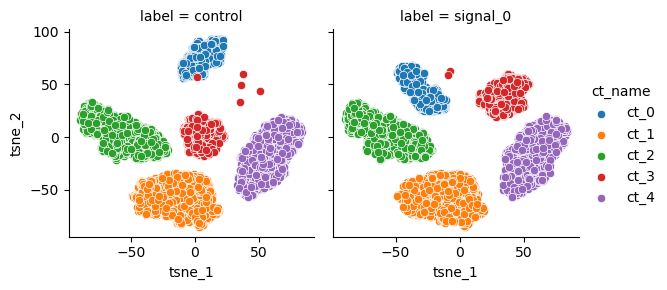

In [15]:
plot_shared_tsne_grid(cyto_adata, col="label", hue = "ct_name", col_wrap=2, n_jobs=8)